In [21]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1       
    except:
        #exception is required for the image boundaries 
        pass
      
    return new_value
   
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
    val_ar = []
    
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

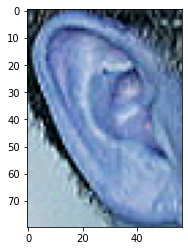

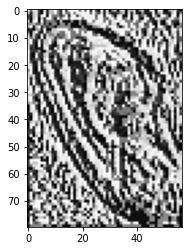

In [19]:
path = '../../dataset_cropped/test_cropped/0003.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)
   
height, width, _ = img.shape
   
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  

plt.imshow(img_lbp, cmap ="gray")
plt.show()

In [24]:
directory = os.listdir('../../dataset_cropped/test_cropped')
#print(directory)

for file in directory:
    img = cv2.imread("../../dataset_cropped/test_cropped/" + file, cv2.IMREAD_COLOR)
    
    height, width, _ = img.shape
   
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_lbp = np.zeros((height, width), np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
            
    cv2.imwrite("../../dataset_lbp/test/" + file, img_lbp) 